In [1]:
#Phase 2 (State/UT wise analysis)
#Note :
#You need to be careful as this phase is whole state/ut wise analysis (not district-wise).
#It is up to you which columns you want to keep or delete to make proper analysis"

#2.1	Analysis of Literacy Rate vs Total Crimes.

#2.2	 Analysis of the type of crime vs each state vs Literacy rate.

#2.3	Analysis of year-on-year total crime rate.

#2.4	 Analysis of area vs overall crime

#2.5	 Analysis of Population vs overall Crime

#2.6	Each state crime report. There is no fixed format to write a report, you can write a report inside the notebook itself based on what you have analyzed in the above points.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [3]:
crime_data=pd.read_excel(r"C:\Users\asus 1\Desktop\Fliprobo\Crimes in India\Phase 2 Crime data.xlsx")

#data taken from https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_crime_rate and census 2011

In [4]:
crime_data.head()

,States,Total Crimes 2018,Total Crimes 2019,Total Crimes 2020,Total Crimes 2021,Crime Rate 2018,Crime Rate 2019,Crime Rate 2020,Crime Rate 2021,Population,Area(Km2),Literacy
0,Andhra Pradesh,144703.0,145751.0,238105,222199,278.1,278.6,452.7,420.4,84580777.0,275045.0,67.02
1,Arunachal Pradesh,2817.0,2877.0,2503,3039,188.7,190.9,164.5,197.7,1383727.0,83743.0,65.38
2,Assam,120572.0,132783.0,121609,133239,354.2,385.8,349.5,379.0,31205576.0,78438.0,72.19
3,Bihar,262815.0,269109.0,257512,282083,222.1,224.0,211.3,228.0,104099452.0,94163.0,61.80
4,Chhattisgarh,98233.0,96561.0,103173,110633,345.1,334.7,352.9,373.7,25545198.0,135192.0,70.28


In [5]:
crime_data.shape

(36, 12)

In [6]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   States             36 non-null     object 
 1   Total Crimes 2018  35 non-null     float64
 2   Total Crimes 2019  35 non-null     float64
 3   Total Crimes 2020  36 non-null     int64  
 4   Total Crimes 2021  36 non-null     int64  
 5   Crime Rate 2018    34 non-null     float64
 6   Crime Rate 2019    34 non-null     float64
 7   Crime Rate 2020    36 non-null     float64
 8   Crime Rate 2021    36 non-null     float64
 9   Population         34 non-null     float64
 10  Area(Km2)          34 non-null     float64
 11  Literacy           34 non-null     float64
dtypes: float64(9), int64(2), object(1)
memory usage: 3.5+ KB


In [7]:
crime_data.describe()

,Total Crimes 2018,Total Crimes 2019,Total Crimes 2020,Total Crimes 2021,Crime Rate 2018,Crime Rate 2019,Crime Rate 2020,Crime Rate 2021,Population,Area(Km2),Literacy
count,35.000000,35.000000,3.600000e+01,36.000000,34.000000,34.000000,36.000000,36.000000,3.400000e+01,34.000000,34.000000
mean,130703.828571,147319.085714,1.833690e+05,169341.944444,370.088235,378.055882,410.802778,375.913889,3.561634e+07,96690.264706,80.142059
std,168140.720532,179546.323404,2.841806e+05,222805.972719,303.498224,327.002366,406.485517,348.819626,4.470287e+07,104006.872590,17.014042
min,77.000000,182.000000,1.470000e+02,128.000000,83.200000,77.100000,51.300000,52.300000,6.447300e+04,30.000000,61.800000
25%,3832.500000,3950.500000,3.187000e+03,3156.750000,195.825000,201.275000,181.650000,188.050000,1.588534e+06,12009.250000,70.757500
50%,55664.000000,72855.000000,7.322250e+04,67173.000000,266.000000,270.000000,280.650000,258.250000,2.106970e+07,54578.000000,77.485000
75%,189646.000000,228579.000000,2.429568e+05,237170.000000,407.150000,390.675000,466.225000,389.350000,6.093140e+07,150578.250000,86.000000
max,585157.000000,628578.000000,1.377681e+06,756753.000000,1342.500000,1586.100000,1808.800000,1479.900000,1.998123e+08,342239.000000,163.340000


In [8]:
crime_data.columns

Index(['States', 'Total Crimes 2018', 'Total Crimes 2019', 'Total Crimes 2020',
       'Total Crimes 2021', 'Crime Rate 2018', 'Crime Rate 2019',
       'Crime Rate 2020', 'Crime Rate 2021', 'Population', 'Area(Km2)',
       'Literacy'],
      dtype='object')

In [9]:
crime_data['Total Crimes 2018']=crime_data['Total Crimes 2018'].fillna(crime_data['Total Crimes 2018'].mean())
crime_data['Total Crimes 2019']=crime_data['Total Crimes 2019'].fillna(crime_data['Total Crimes 2019'].median())
crime_data['Crime Rate 2018']=crime_data['Crime Rate 2018'].fillna(crime_data['Crime Rate 2018'].mean())
crime_data['Crime Rate 2019']=crime_data['Crime Rate 2019'].fillna(crime_data['Crime Rate 2019'].median())
crime_data['Population']=crime_data['Population'].fillna(crime_data['Population'].median())
crime_data['Area(Km2)']=crime_data['Area(Km2)'].fillna(crime_data['Area(Km2)'].median())
crime_data['Literacy']=crime_data['Literacy'].fillna(crime_data['Literacy'].median())

In [10]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   States             36 non-null     object 
 1   Total Crimes 2018  36 non-null     float64
 2   Total Crimes 2019  36 non-null     float64
 3   Total Crimes 2020  36 non-null     int64  
 4   Total Crimes 2021  36 non-null     int64  
 5   Crime Rate 2018    36 non-null     float64
 6   Crime Rate 2019    36 non-null     float64
 7   Crime Rate 2020    36 non-null     float64
 8   Crime Rate 2021    36 non-null     float64
 9   Population         36 non-null     float64
 10  Area(Km2)          36 non-null     float64
 11  Literacy           36 non-null     float64
dtypes: float64(9), int64(2), object(1)
memory usage: 3.5+ KB


# 2.1 Analysis of Literacy Rate vs Total Crimes.

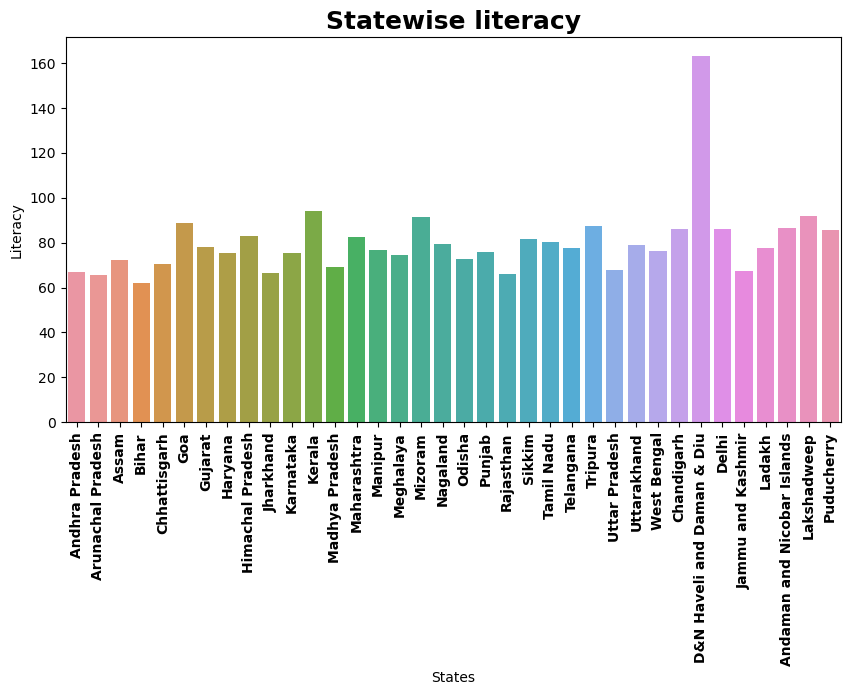

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x='States', y='Literacy', data=crime_data )
plt.xticks(fontsize=10, fontweight ='bold', rotation=90)
plt.title('Statewise literacy', fontsize=18,fontweight ='bold')
plt.show()

In [12]:
df_literacy=pd.DataFrame({'State':crime_data['States'], 'Literacy':crime_data['Literacy']})
df_sorted_literacy=df_literacy.sort_values('Literacy', ascending=False)
df_sorted_literacy.head()

,State,Literacy
29,D&N Haveli and Daman & Diu,163.34
11,Kerala,94.00
34,Lakshadweep,91.85
16,Mizoram,91.33
5,Goa,88.70


In [13]:
df_sorted_literacy.tail()

,State,Literacy
0,Andhra Pradesh,67.02
9,Jharkhand,66.41
20,Rajasthan,66.11
1,Arunachal Pradesh,65.38
3,Bihar,61.80


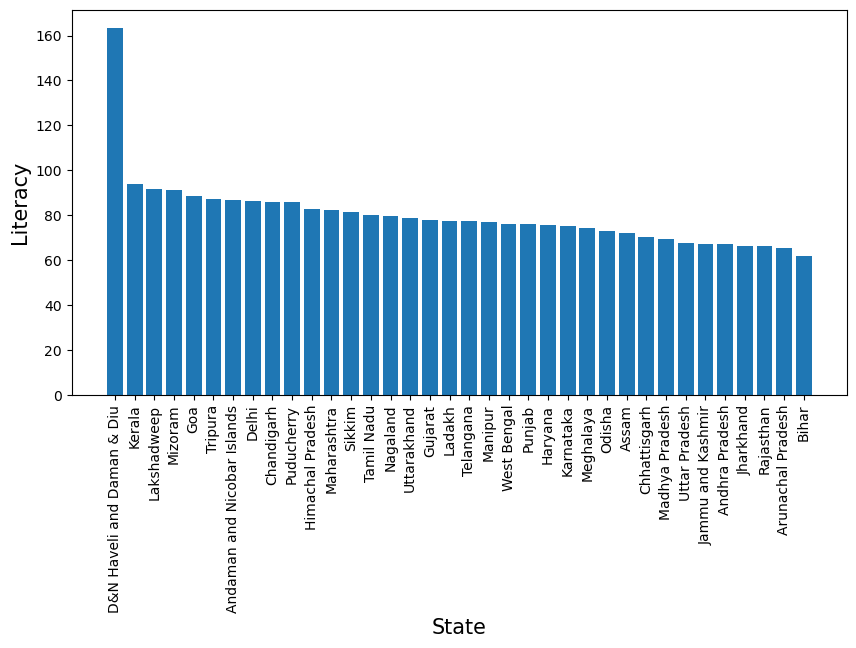

In [14]:
plt.figure(figsize=(10,5))
plt.bar('State', 'Literacy',data=df_sorted_literacy)
plt.xlabel("State", size=15)
plt.ylabel("Literacy", size=15)
plt.xticks(rotation=90)
plt.show()

In [15]:
#D&N Haveli and Daman & Diu, Kerala, Lakshadweep, Mizoram, Goa are among the states with highest literacy rate and states with lowest literacy rate are Andhra Pradesh, Jharkhand, Rajasthan, Arunachal Pradesh, Bihar

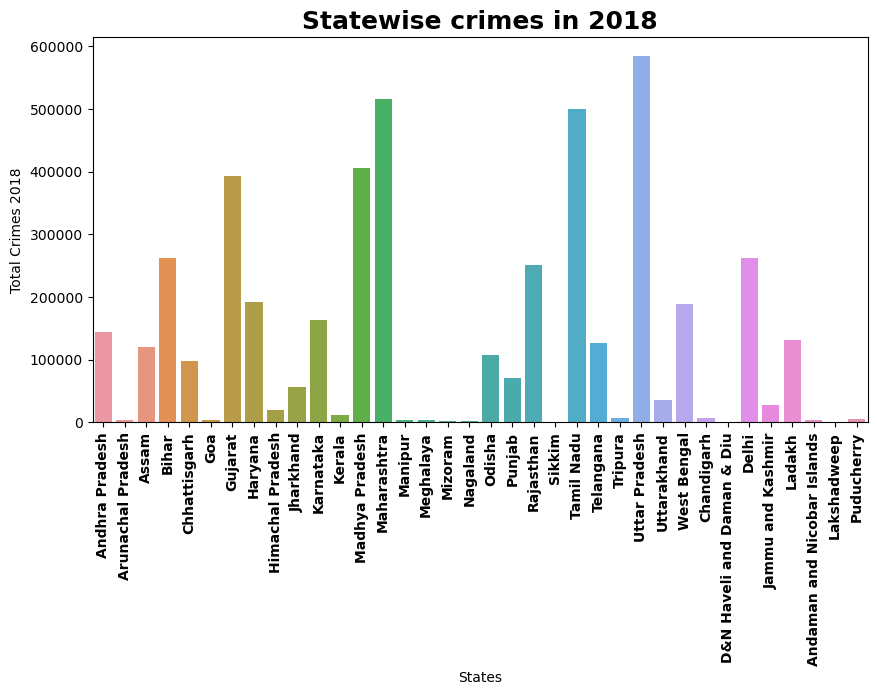

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x='States', y='Total Crimes 2018', data=crime_data )
plt.xticks(fontsize=10, fontweight ='bold', rotation=90)
plt.title('Statewise crimes in 2018', fontsize=18,fontweight ='bold')
plt.show()

In [17]:
df2018=pd.DataFrame({'State':crime_data['States'], 'Crimes 2018':crime_data['Total Crimes 2018']})
df_sorted2018=df2018.sort_values('Crimes 2018', ascending=False)
df_sorted2018.head()

,State,Crimes 2018
25,Uttar Pradesh,585157.0
13,Maharashtra,515674.0
22,Tamil Nadu,499188.0
12,Madhya Pradesh,405129.0
6,Gujarat,393194.0


In [18]:
df_sorted2018.tail()

,State,Crimes 2018
16,Mizoram,2351.0
17,Nagaland,1775.0
21,Sikkim,869.0
29,D&N Haveli and Daman & Diu,649.0
34,Lakshadweep,77.0


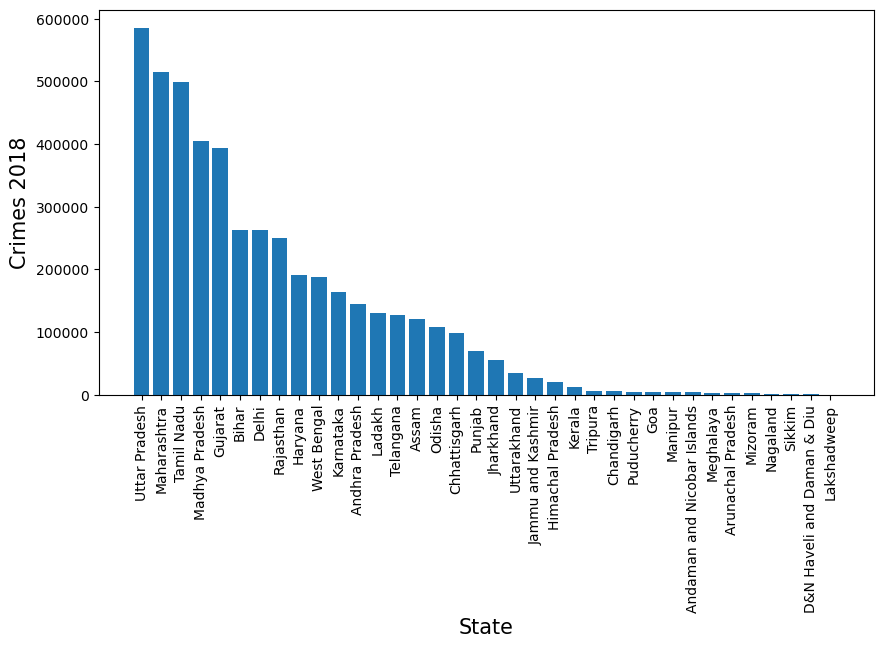

In [19]:
plt.figure(figsize=(10,5))
plt.bar('State', 'Crimes 2018',data=df_sorted2018)
plt.xlabel("State", size=15)
plt.ylabel("Crimes 2018", size=15)
plt.xticks(rotation=90)
plt.show()

In [20]:
#from the above graph we observed that UP, Maharashtra, TN, MP and Gujarat were ammont the states with maximum number of crimes and lakshadweep, sikkim, D&N Haveli and Daman & Diu are among the safest places with minimum crimes commited for the year. Andhra Pradesh is amont the states with lowest Literacy but the crimes commited are not lowest.

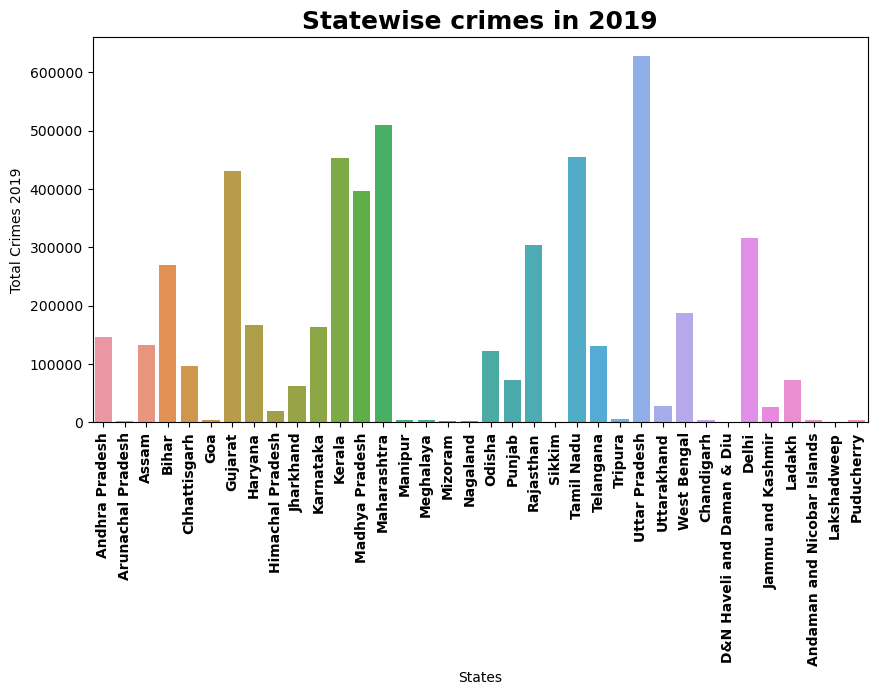

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(x='States', y='Total Crimes 2019', data=crime_data)
plt.xticks(fontsize=10, fontweight ='bold', rotation=90)
plt.title('Statewise crimes in 2019', fontsize=18,fontweight ='bold')
plt.show()

In [22]:
df2019=pd.DataFrame({'State':crime_data['States'], 'Crimes 2019':crime_data['Total Crimes 2019']})
df_sorted2019=df2019.sort_values('Crimes 2019', ascending=False)
df_sorted2019.head()

,State,Crimes 2019
25,Uttar Pradesh,628578.0
13,Maharashtra,509443.0
22,Tamil Nadu,455094.0
11,Kerala,453083.0
6,Gujarat,431066.0


In [23]:
df_sorted2019.tail()

,State,Crimes 2019
1,Arunachal Pradesh,2877.0
17,Nagaland,1661.0
21,Sikkim,821.0
29,D&N Haveli and Daman & Diu,660.0
34,Lakshadweep,182.0


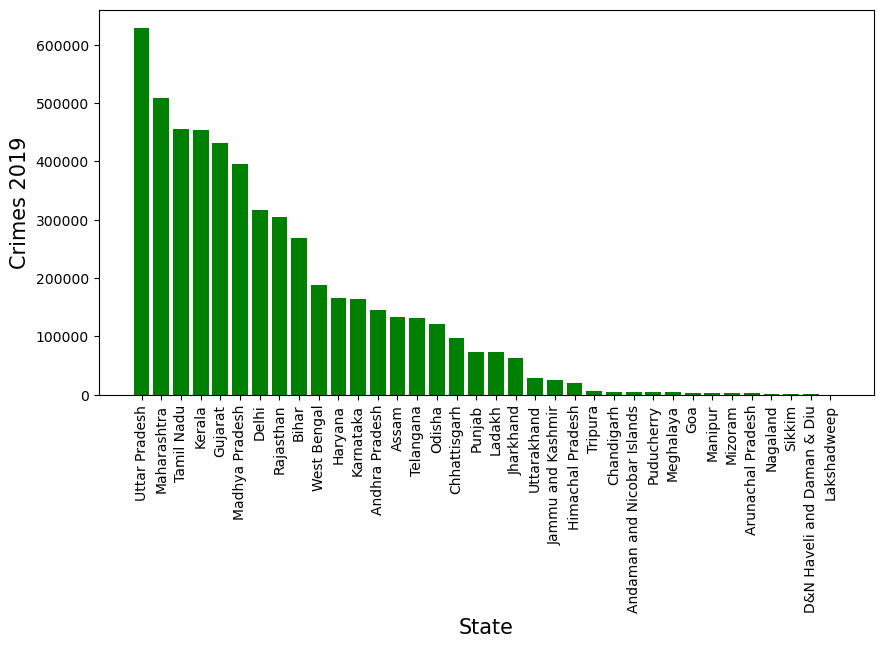

In [24]:
plt.figure(figsize=(10,5))
plt.bar('State', 'Crimes 2019',data=df_sorted2019, color='green')
plt.xlabel("State", size=15)
plt.ylabel("Crimes 2019", size=15)
plt.xticks(rotation=90)
plt.show()

In [25]:
# The crime in Kerala has increased a lot in comparison with year 2018 and its amont the top 5 states with maximum number of crimes along with Uttar Pradesh, Maharashtra, Tamil Nadu, Gujarat. Kerala is among the staes with highest litearcy but despite that the crimes commited are also among highest  

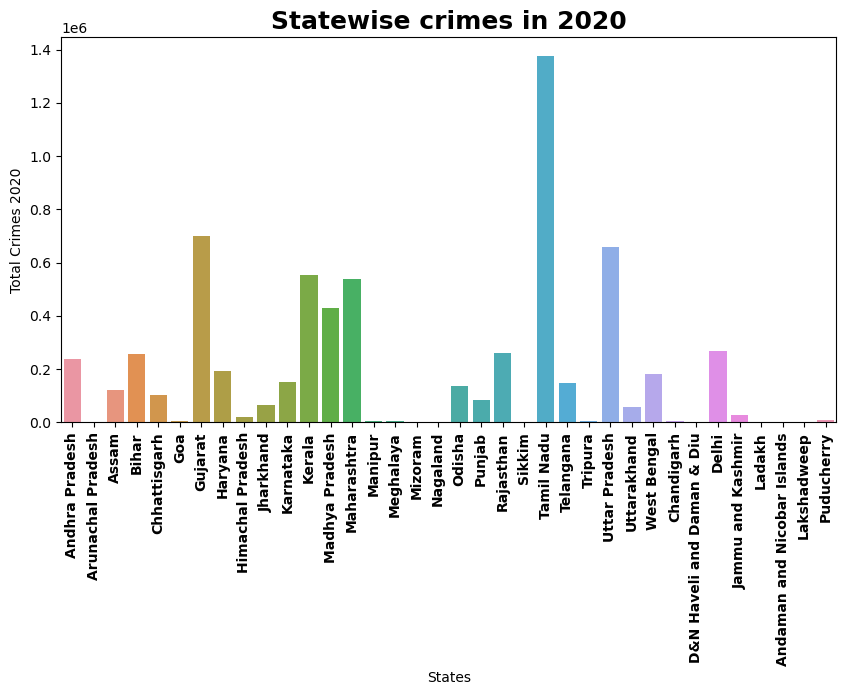

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(x='States', y='Total Crimes 2020', data=crime_data)
plt.xticks(fontsize=10, fontweight ='bold', rotation=90)
plt.title('Statewise crimes in 2020', fontsize=18,fontweight ='bold')
plt.show()

In [27]:
df2020=pd.DataFrame({'State':crime_data['States'], 'Crimes 2020':crime_data['Total Crimes 2020']})
df_sorted2020=df2020.sort_values('Crimes 2020', ascending=False)
df_sorted2020.head()

,State,Crimes 2020
22,Tamil Nadu,1377681
6,Gujarat,699619
25,Uttar Pradesh,657925
11,Kerala,554724
13,Maharashtra,539003


In [28]:
df_sorted2020.tail()

,State,Crimes 2020
17,Nagaland,1511
21,Sikkim,675
29,D&N Haveli and Daman & Diu,533
32,Ladakh,403
34,Lakshadweep,147


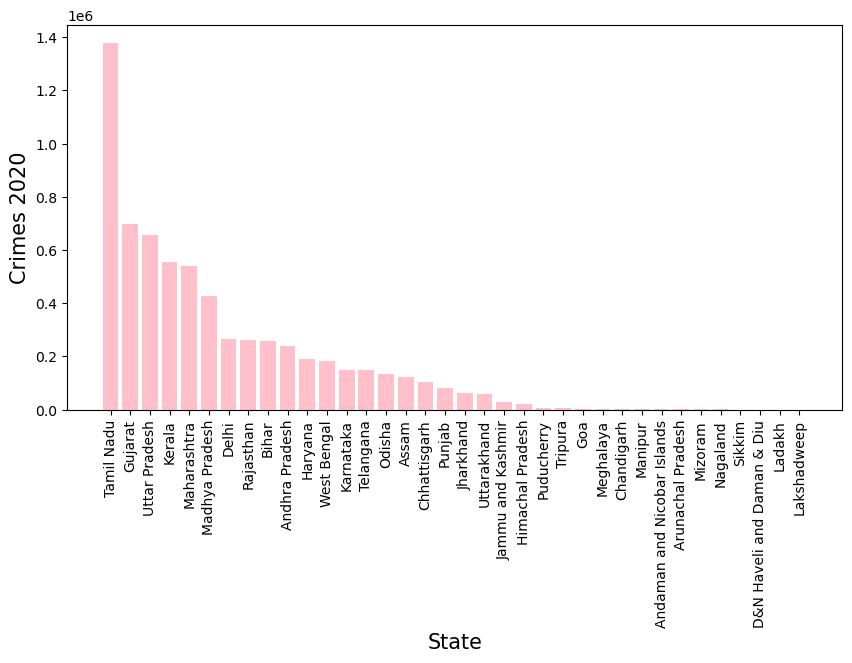

In [29]:
plt.figure(figsize=(10,5))
plt.bar('State', 'Crimes 2020',data=df_sorted2020, color='pink')
plt.xlabel("State", size=15)
plt.ylabel("Crimes 2020", size=15)
plt.xticks(rotation=90)
plt.show()

In [30]:
#Crimes in TN and gujarat have increased and they are now among the tops stated wrt to the number of crimes

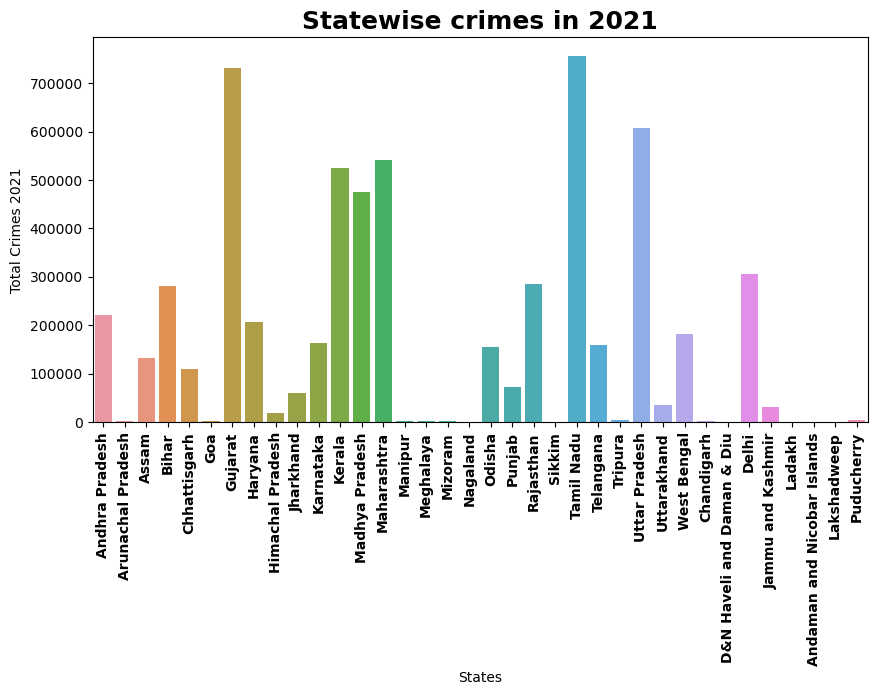

In [31]:
plt.figure(figsize=(10, 5))
sns.barplot(x='States', y='Total Crimes 2021', data=crime_data )
plt.xticks(fontsize=10, fontweight ='bold', rotation=90)
plt.title('Statewise crimes in 2021', fontsize=18,fontweight ='bold')
plt.show()

In [32]:
df2021=pd.DataFrame({'State':crime_data['States'], 'Crimes 2021':crime_data['Total Crimes 2021']})
df_sorted2021=df2021.sort_values('Crimes 2021', ascending=False)
df_sorted2021.head()

,State,Crimes 2021
22,Tamil Nadu,756753
6,Gujarat,731738
25,Uttar Pradesh,608082
13,Maharashtra,540800
11,Kerala,524960


In [33]:
df_sorted2021.tail()

,State,Crimes 2021
33,Andaman and Nicobar Islands,1332
21,Sikkim,728
29,D&N Haveli and Daman & Diu,579
32,Ladakh,559
34,Lakshadweep,128


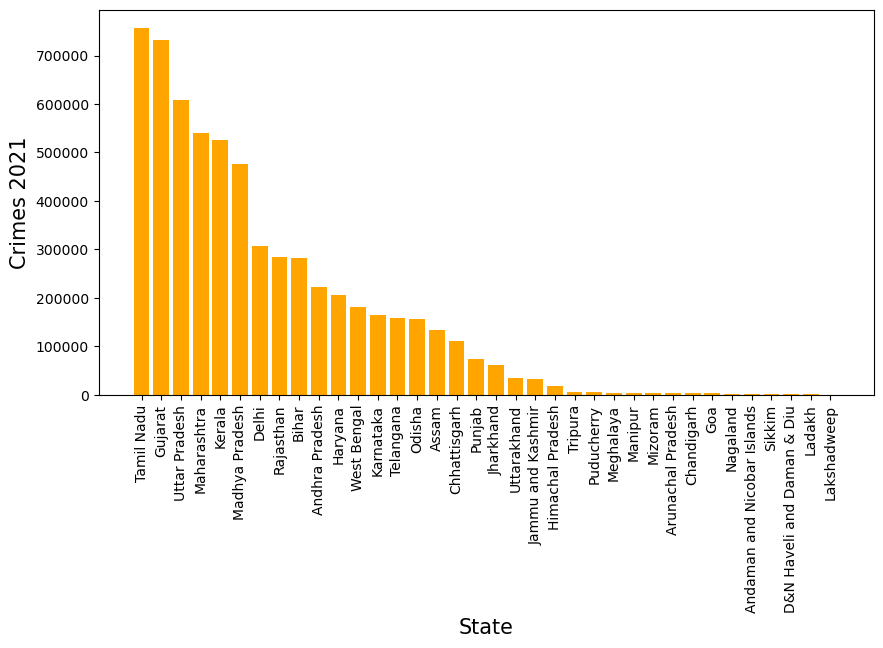

In [34]:
plt.figure(figsize=(10,5))
plt.bar('State', 'Crimes 2021',data=df_sorted2021, color='orange')
plt.xlabel("State", size=15)
plt.ylabel("Crimes 2021", size=15)
plt.xticks(rotation=90)
plt.show()

In [35]:
#Tamil Nadu, Gujarat, Uttar Pradesh, Maharashtra, Kerala are among the states with max number of cromes committed in the year 2021

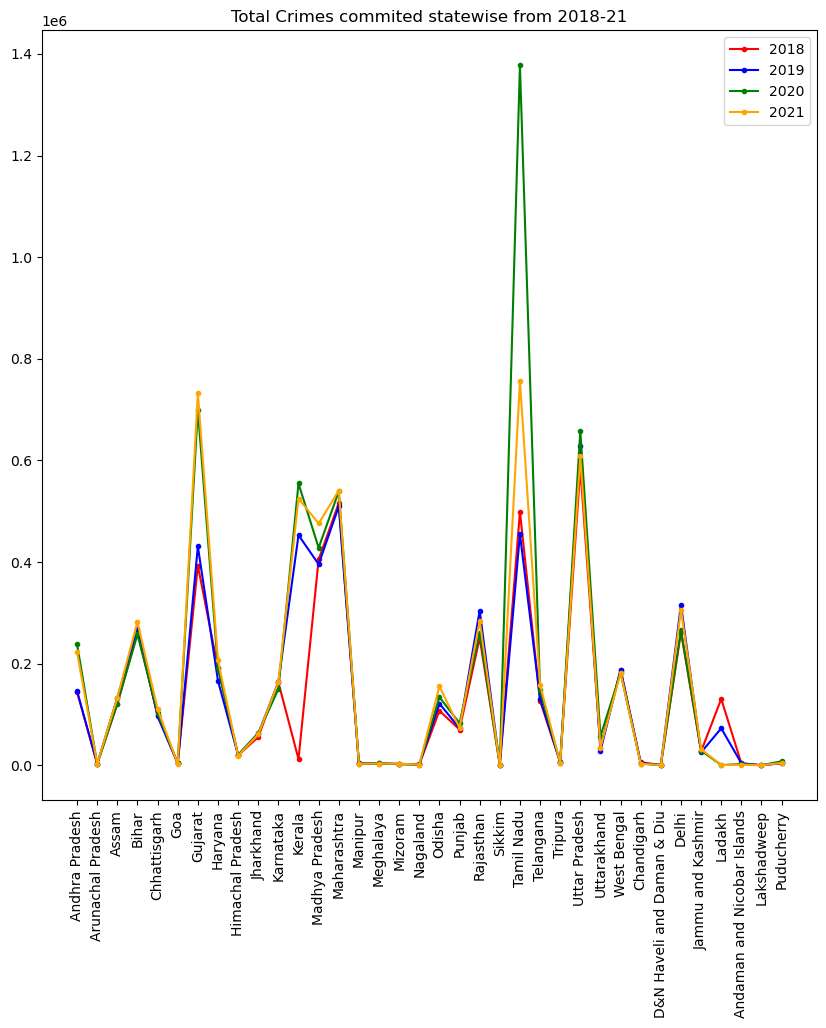

In [36]:
plt.figure(figsize=(10,10))
plt.plot('States', 'Total Crimes 2018', color='red', data=crime_data, marker='.', label='2018')
plt.plot('States', 'Total Crimes 2019', color='blue', data=crime_data, marker='.', label='2019')
plt.plot('States', 'Total Crimes 2020', color='green', data=crime_data, marker='.', label='2020')
plt.plot('States', 'Total Crimes 2021', color='orange', data=crime_data, marker='.', label='2021')
plt.xticks(rotation=90)
plt.title('Total Crimes commited statewise from 2018-21')
plt.legend()
plt.show()

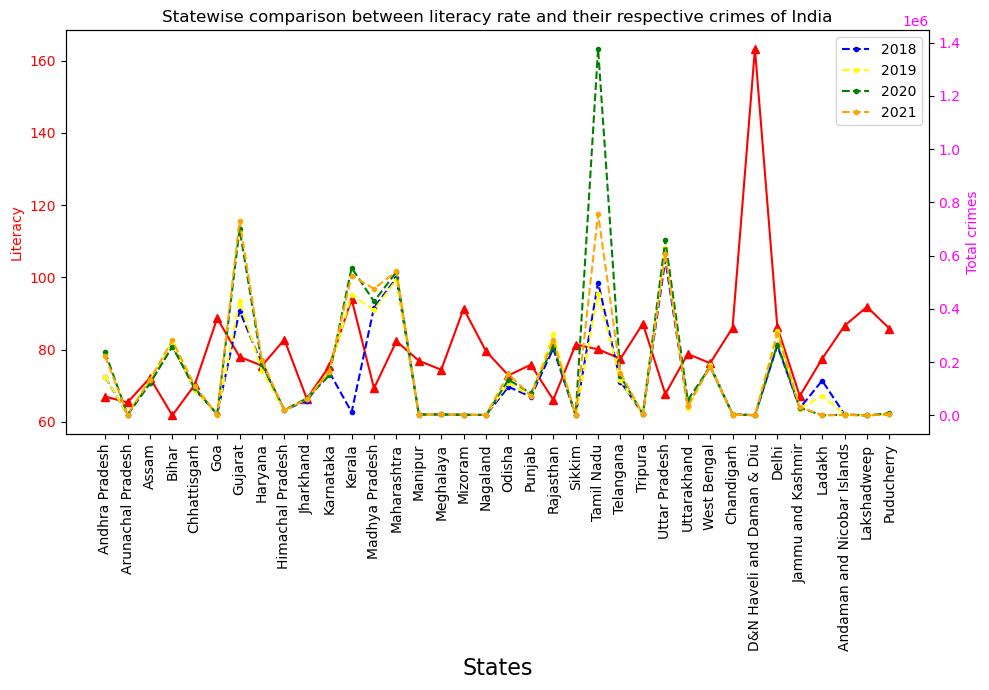

In [37]:
fig=plt.figure(figsize=(10,7))
plt.plot(crime_data['States'],crime_data['Literacy'],color='red',marker='^', label='Literacy')
plt.tick_params(axis='y', labelcolor='red')
plt.ylabel('Literacy',color='red')
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
ax2 = plt.twinx()
plt.plot(crime_data['States'],crime_data['Total Crimes 2018'],color='blue',marker='.',ls='--', label='2018')
plt.plot(crime_data['States'],crime_data['Total Crimes 2019'],color='yellow',marker='.',ls='--', label='2019')
plt.plot(crime_data['States'],crime_data['Total Crimes 2020'],color='green',marker='.',ls='--', label='2020')
plt.plot(crime_data['States'],crime_data['Total Crimes 2021'],color='orange',marker='.',ls='--', label='2021')
plt.ylabel('Total crimes',color='magenta')
plt.tick_params(axis='y', labelcolor='magenta')
plt.title('Statewise comparison between literacy rate and their respective crimes of India')
plt.tight_layout()
plt.legend()
plt.show()